In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Attribute information

* gender: Male/Female
* SeniorCitizen: Senior citizen or not (1,0)
* Partner: Whether customer has a partner or not (1,0)
* Dependents: Whether customer has dependents or not. (Yes, No)
* tenure: No. of months customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetSevice: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) 
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

In [2]:
columns = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure',\
           'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', \
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', \
           'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', names=columns,header=0 )
print(df.shape)

(7043, 21)


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Missing values?
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Categorical features to dummy variables

In [6]:
categ_features = ['gender','Partner','Dependents','PhoneService',\
                  'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', \
                  'PaperlessBilling','PaymentMethod']
dummies_data = pd.get_dummies(df[categ_features])

# Join the new columns with your original dataframe
og_df = df.copy()
df = pd.concat([df,dummies_data],axis=1)

# Drop the original columns
df.drop(categ_features,axis=1, inplace=True)

df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# 2. Plot the different features

In [7]:
def plot_pie_distribution(data,columns,cols=3, W=25,H=45, hspace=0.2, wspace=0.2):
    
    fig = plt.figure(figsize=(W,H))
#     fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = int(np.ceil(float(len(columns)) / cols))
    
    for i,column in enumerate(columns):
        plot_data = data.groupby(column)["Churn"].count()
        labels = plot_data.keys()

        ax = fig.add_subplot(rows, cols, i+1)
        ax.pie(plot_data,labels=labels,autopct="%.1f%%", pctdistance=0.5)
        ax.set_title(f'Churn by {column}',fontsize=18)
    
#     sns.catplot(x="Churn", y=column, kind="box", data=data)
    

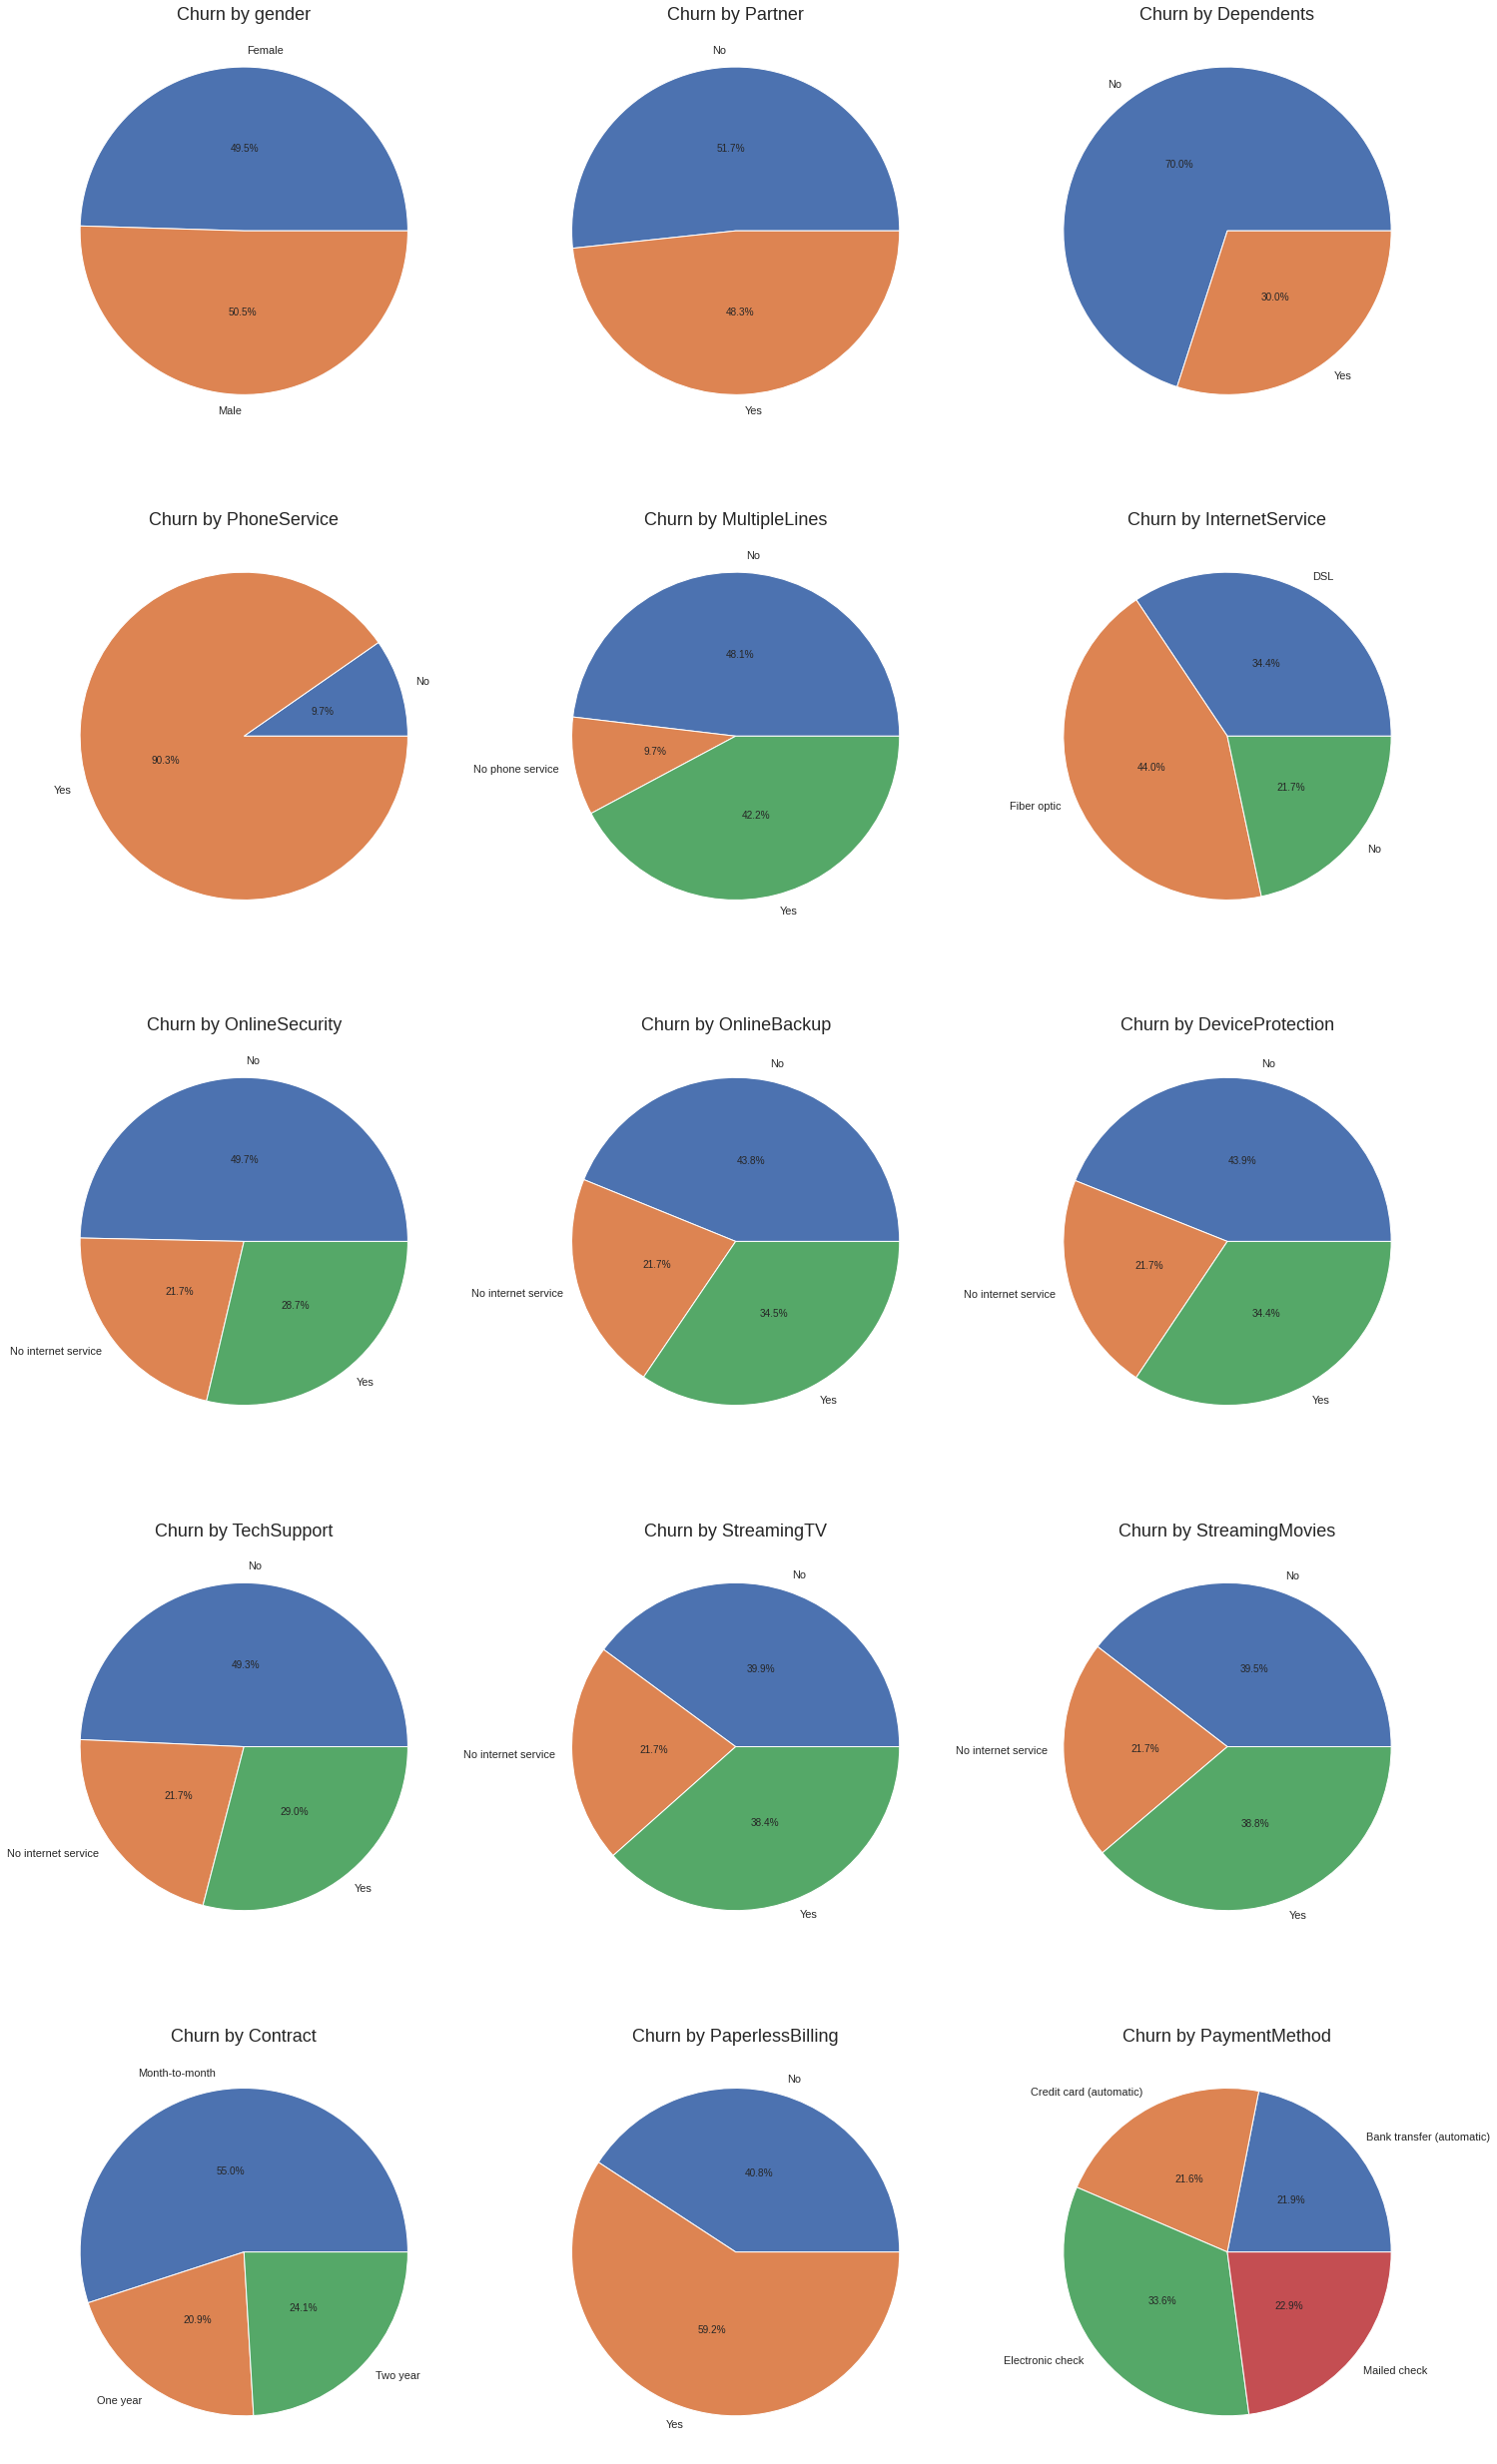

In [8]:
# Plot pie charts for all the categorical features
plot_pie_distribution(og_df,categ_features)

# 3. Relationship between tenure and contract duration

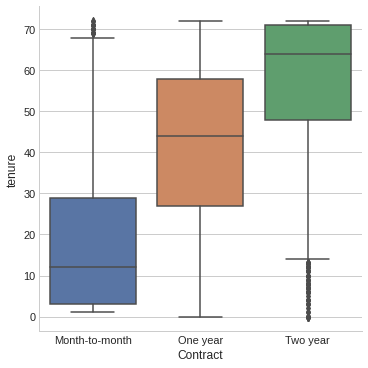

In [9]:
# Plot 
sns.catplot(x="Contract", y="tenure",kind="box", data=og_df)

**Using the visualisation above we can see that there is a strong positive relationship between tenure and Contract. As the contract duration increases so does the tenure.**